# Machine Learning parte 1: otimização de modelos através de hiperparâmetros

* Este estudo é uma continuação do estudo de [Validação Cruzada](https://colab.research.google.com/drive/15ibd-svawLuSqctiV9153p4tvtfPCv1A?usp=sharing).

# Abertura do dataset e itens do projeto anterior

In [1]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv"
dados = pd.read_csv(uri).drop(columns=["Unnamed: 0"], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [2]:
# simulação de uma péssima organização dos dados
dados_azar = dados.sort_values('vendido', ascending = True)
x_azar = dados_azar[['preco', 'idade_do_modelo', 'km_por_ano']]
y_azar = dados_azar['vendido']

In [3]:
# modelo baseline
import numpy as np
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate

SEED = 301
np.random.seed(SEED)

dummy_stratified = DummyClassifier()
results = cross_validate(dummy_stratified, x_azar, y_azar, cv = 10)

media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print(f'Accuracy mean = {media*100:.2f}%')
print(f'Accuracy interval = [{(media - 2*desvio_padrao)*100 :.2f}%, {(media + 2*desvio_padrao)*100 :.2f}%]')

Accuracy mean = 58.00%
Accuracy interval = [58.00%, 58.00%]


In [9]:
# 1º MODELO Decision Tree
from sklearn.tree import DecisionTreeClassifier

SEED = 301
np.random.seed(SEED)

model_decisiontree = DecisionTreeClassifier(max_depth = 2)
results = cross_validate(model_decisiontree, x_azar, y_azar, cv = 10)

media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print(f'Accuracy mean = {media*100:.2f}%')
print(f'Accuracy interval = [{(media - 2*desvio_padrao)*100 :.2f}%, {(media + 2*desvio_padrao)*100 :.2f}%]')

Accuracy mean = 75.78%
Accuracy interval = [73.83%, 77.73%]


In [5]:
# gerando dados aleatórios de modelo de carro para simulação de agrupamento ao usar o estimador
np.random.seed(SEED)
dados['modelo'] = dados['idade_do_modelo'] + np.random.randint(-2, 3, size=10000)
dados['modelo'] = dados['modelo'] + abs(dados['modelo'].min()) + 1
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo
0,30941.02,1,18,35085.22134,18
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,14
3,95276.14,0,3,43167.32682,6
4,117384.68,1,4,12770.11290,5


In [6]:
def imprime_resultados(results):
  media = results['test_score'].mean()
  desvio_padrao = results['test_score'].std()

  print(f'Accuracy mean = {media*100:.2f}%')
  print(f'Accuracy interval = [{(media - 2*desvio_padrao)*100 :.2f}%, {(media + 2*desvio_padrao)*100 :.2f}%]')

In [7]:
# 2º MODELO
# GroupKFold em um pipeline com StandardScaler e SVC
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
model_svc = SVC()

pipeline = Pipeline([('transformacao', scaler), ('estimador', model_svc)])

cv = GroupKFold(n_splits = 10)
results = cross_validate(pipeline, x_azar, y_azar, cv = cv, groups = dados['modelo'], return_train_score=False)
imprime_resultados(results)

Accuracy mean = 76.68%
Accuracy interval = [74.28%, 79.08%]


# Variações no max_depth da Árvore de Decisão

* A Validação Cruzada gera 10 modelos diferentes para avaliação. Para o uso de fato, utilizamos todo o dataset que deve ser usado em um fit de fato.

## Profundidade 2

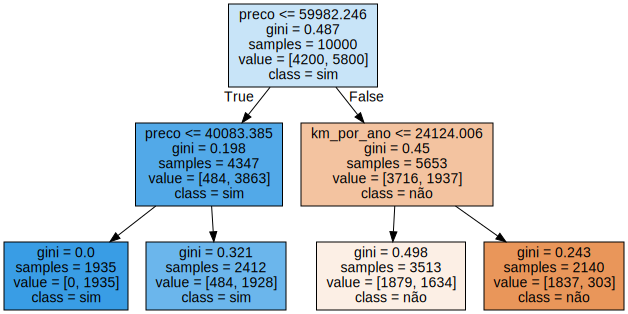

In [14]:
from sklearn.tree import export_graphviz
import graphviz

model_decisiontree.fit(x_azar, y_azar)
features = x_azar.columns
dot_data = export_graphviz(model_decisiontree, out_file = None, filled = True, class_names = ['não', 'sim'], feature_names = features)

graph = graphviz.Source(dot_data)
graph

## Profundidade 3

In [15]:
SEED = 301
np.random.seed(SEED)

model_decisiontree = DecisionTreeClassifier(max_depth = 3)
results = cross_validate(model_decisiontree, x_azar, y_azar, cv = 10)

media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print(f'Accuracy mean = {media*100:.2f}%')
print(f'Accuracy interval = [{(media - 2*desvio_padrao)*100 :.2f}%, {(media + 2*desvio_padrao)*100 :.2f}%]')

Accuracy mean = 78.70%
Accuracy interval = [75.87%, 81.53%]


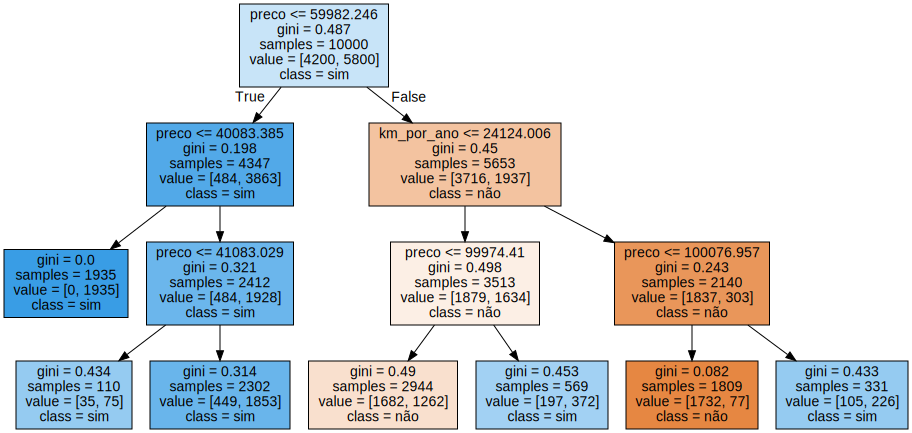

In [16]:
from sklearn.tree import export_graphviz
import graphviz

model_decisiontree.fit(x_azar, y_azar)
features = x_azar.columns
dot_data = export_graphviz(model_decisiontree, out_file = None, filled = True, class_names = ['não', 'sim'], feature_names = features)

graph = graphviz.Source(dot_data)
graph

## Profundidade 10

In [17]:
SEED = 301
np.random.seed(SEED)

model_decisiontree = DecisionTreeClassifier(max_depth = 10)
results = cross_validate(model_decisiontree, x_azar, y_azar, cv = 10)

media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print(f'Accuracy mean = {media*100:.2f}%')
print(f'Accuracy interval = [{(media - 2*desvio_padrao)*100 :.2f}%, {(media + 2*desvio_padrao)*100 :.2f}%]')

Accuracy mean = 77.03%
Accuracy interval = [73.81%, 80.25%]


* A acurácia foi menor do que com a profundidade máxima 3.

# Otimização de hiperparâmetro (max_depth)

## Teste de várias profundidades máximas

In [54]:
def roda_arvore_de_decisao(max_depth):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  model = DecisionTreeClassifier(max_depth = max_depth)
  results = cross_validate(model, x_azar, y_azar, cv = cv, groups = dados['modelo'], return_train_score = True)

  mean_test_score = results['test_score'].mean()
  mean_train_score = results['train_score'].mean()

  tabela = [max_depth, mean_train_score, mean_test_score]
  return tabela

In [55]:
resultados = pd.DataFrame([roda_arvore_de_decisao(i) for i in range(1, 33)], columns = ['max_depth', 'train', 'test'])

In [57]:
resultados.head(10)

,max_depth,train,test
0,1,0.757912,0.757842
1,2,0.757912,0.757842
2,3,0.787510,0.786726
3,4,0.787876,0.786328
4,5,0.789410,0.785559
5,6,0.791701,0.781233
6,7,0.794968,0.779632
7,8,0.798878,0.778580
8,9,0.804590,0.773770
9,10,0.811590,0.771942


* A Árvore começa a sofrer **overfit**, por isso o score do treino sempre aumenta, enquanto o score de teste começa a ser prejudicado.

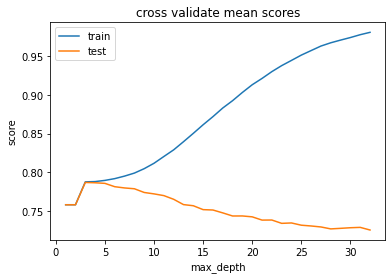

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.lineplot(data = resultados, x = 'max_depth', y = 'train', label = 'train')
ax = sns.lineplot(data = resultados, x = 'max_depth', y = 'test', label = 'test')

ax.set_xlabel('max_depth')
ax.set_ylabel('score')
ax.set_title('cross validate mean scores')

plt.show()

In [78]:
resultados.sort_values('test', ascending = False).head(3)

,max_depth,train,test
2,3,0.787510,0.786726
3,4,0.787876,0.786328
4,5,0.789410,0.785559


* A árvore com melhor pontuação de treino foi construída com profundidade máxima 3.